In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_mod
import esmlab

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
experiment = 'esm-piControl'
esm_piControl = xr.Dataset()
for varname in ['CO2', 'SFCO2_LND', 'SFCO2_OCN']:
    ds = tseries_mod.tseries_get(varname, 'atm', experiment)
    esm_piControl = xr.merge((esm_piControl, ds))
da = esm_piControl['CO2'].isel(lev=-1)
da.name = 'CO2_BOT'
esm_piControl = xr.merge((esm_piControl, da))
# print(esm_piControl)
# print(esm_piControl.time)

entering tseries_gen for CO2
['/glade/scratch/klindsay/archive/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004/atm/proc/tseries/month_1/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004.cam.h0.CO2.000101-005012.nc', '/glade/scratch/klindsay/archive/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004/atm/proc/tseries/month_1/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004.cam.h0.CO2.005101-007512.nc']


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.12.203.5:39028 remote=tcp://10.12.203.5:42669>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.12.203.5:39074 remote=tcp://10.12.203.5:42669>


entering tseries_gen for SFCO2_LND
['/glade/scratch/klindsay/archive/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004/atm/proc/tseries/month_1/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004.cam.h0.SFCO2_LND.000101-005012.nc', '/glade/scratch/klindsay/archive/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004/atm/proc/tseries/month_1/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004.cam.h0.SFCO2_LND.005101-007512.nc']


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.12.203.5:48522 remote=tcp://10.12.203.5:38220>


entering tseries_gen for SFCO2_OCN
['/glade/scratch/klindsay/archive/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004/atm/proc/tseries/month_1/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004.cam.h0.SFCO2_OCN.000101-005012.nc', '/glade/scratch/klindsay/archive/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004/atm/proc/tseries/month_1/b.e21.B1850_BPRP.f09_g17.CMIP6-piControl.tst.004.cam.h0.SFCO2_OCN.005101-007512.nc']


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.12.203.5:46844 remote=tcp://10.12.203.5:33448>


In [4]:
esm_piControl_mon_anom = esmlab.climatology.compute_mon_anomaly(esm_piControl)
# print(esm_piControl_mon_anom)
# print(esm_piControl_mon_anom.time)

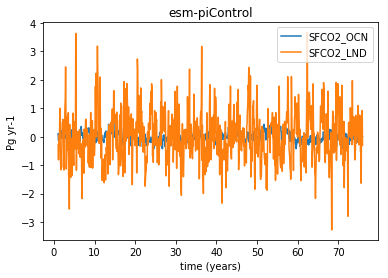

In [5]:
tseries_mod.tseries_plot_1ds(esm_piControl_mon_anom, ['SFCO2_OCN', 'SFCO2_LND'], title=experiment, region_val='Global')

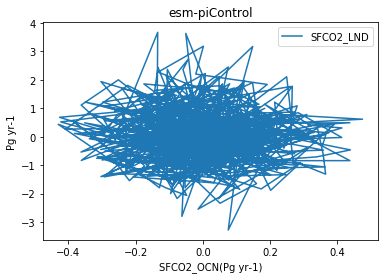

In [6]:
tseries_mod.tseries_plot_vars_vs_var(esm_piControl_mon_anom, 'SFCO2_OCN', ['SFCO2_LND'], title=experiment, region_val='Global')

In [7]:
esm_piControl_ann = esmlab.climatology.compute_ann_mean(esm_piControl)
esm_piControl_ann.time.attrs['calendar'] = esm_piControl.time.attrs['calendar']
# print(esm_piControl_ann)
# print(esm_piControl_ann.time)

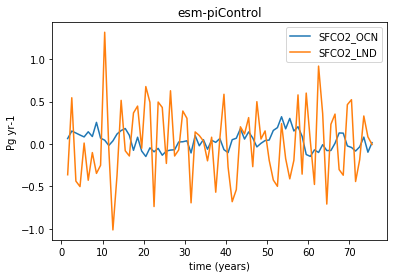

In [8]:
tseries_mod.tseries_plot_1ds(esm_piControl_ann, ['SFCO2_OCN', 'SFCO2_LND'], title=experiment, region_val='Global')

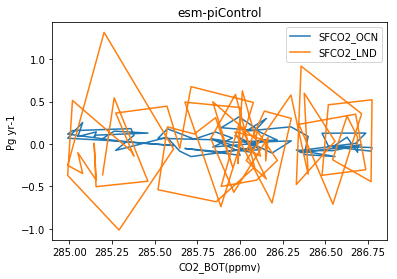

In [9]:
tseries_mod.tseries_plot_vars_vs_var(esm_piControl_ann, 'CO2_BOT', ['SFCO2_OCN', 'SFCO2_LND'], title=experiment, region_val='Global')

In [10]:
esm_piControl_mon_clim = esmlab.climatology.compute_mon_climatology(esm_piControl)
# print(esm_piControl_mon_clim)
# print(esm_piControl_mon_clim.time)